# 【DEO1611】The Language of Technical Computing (數學應用軟體簡介)



### ※ Note
* Upload your jupyter notebook before **23:59 5/8**
* Late assignment would get 0% 
* Plagiarism(抄襲) is strictly prohibited, that is 0%
* You are encouraged to discuss with your parners (_Act together we go far_)
* Remember save your output and add comments beside your source code

## Python tutorial - Quiz4

Import required packages

In [190]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import colors


### (15%) Question1: Piecewise function - atan2

The function $\operatorname {atan2} (y,x)$ (from "2-argument arctangent") is defined as the angle in the Euclidean plane, given in radians, between the positive x axis and the ray to the point $(x, y) \ne (0, 0)$. 

It was originally intended to return a correct and unambiguous value for the angle $\theta$ in converting from cartesian coordinates $(x, y)$ to polar coordinates $(r, \theta)$. $\operatorname {atan2} (y,x)$ returns a single value $\theta$ such that $−\pi < \theta ≤ \pi$ and, for $r={\sqrt {x^{2}+y^{2}}}$

>在極座標$(r, \theta)$中，$x$, $y$可以分別利用$r\cdot \cos{\theta}$和$r\cdot \sin{\theta}$求得，但因為sinusoidal function週期是$2\pi$，因此$\cos{\theta}=\cos{\theta+2k\pi}, k\in\mathbb{Z}$，因此只需要把$\theta$限制在$(-\pi, \pi]$就能計算$\cos{\theta}$


<center><a title="Sbyrnes321, CC0, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Atan2definition.svg"><img width="250px" height="auto" alt="Atan2definition" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Atan2definition.svg/512px-Atan2definition.svg.png"></a></center>


$$
\operatorname {atan2} (y,x)=
\begin{cases}
    \arctan({\frac {y}{x}})&{\text{if }}x>0,\\
    \arctan({\frac {y}{x}})+\pi &{\text{if }}x<0{\text{ and }}y\geq 0,\\
    \arctan({\frac {y}{x}})-\pi &{\text{if }}x<0{\text{ and }}y<0,\\
    +{\frac {\pi }{2}}&{\text{if }}x=0{\text{ and }}y>0,\\
    -{\frac {\pi }{2}}&{\text{if }}x=0{\text{ and }}y<0,\\
    {\text{undefined}}&{\text{if }}x=0{\text{ and }}y=0.
\end{cases}
\tag{1}
$$

(Reference: https://en.wikipedia.org/wiki/Atan2)

In [198]:
# finish codes below! ---------------------------
def atan2(y, x):
    #5 conditions of atan2
    mask1 = (x>0)  
    mask2 = (x<0) & (y>=0)
    mask3 = (x<0) & (y<0)
    mask4 = (x==0) & (y>0)
    mask5 = (x==0) & (y<0)
    #the outcomes if input meets the condition
    out = np.zeros_like(y)
    out = np.where(mask1, np.arctan(y/x),  out)
    out = np.where(mask2, np.arctan(y/x)+np.pi,  out)
    out = np.where(mask3, np.arctan(y/x)-np.pi,  out)
    out = np.where(mask4, +np.pi/2,  out)
    out = np.where(mask5, -np.pi/2,  out)
    return out
#------------------------------------------------


### (10%) Question2: Piecewise function - triangle function

\begin{equation}
\Lambda\left(\dfrac{x}{a}\right) = 
    \begin{cases}
        1-\dfrac{|x|}{a}, \; |x|<a \\
        0, \; \text{otherwise}
    \end{cases}
    \tag{2}
\end{equation}

>可以發現$2a$是triangle function的總寬度(左邊+右邊)

<center>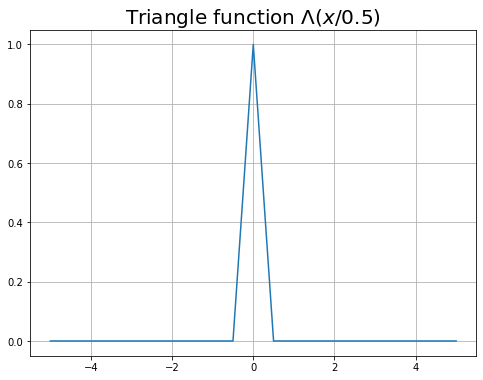</center>

**❓Question**

Please (1) create a triangle function with $a=0.5$ and (2) use the function to create an 1-D array x in $[-5,5]$ with spacing $\Delta{x}=0.01$

In [200]:
# finish codes below! ---------------------------
def linspace(a, b, dx):
    num = int((b-a)/dx)+1
    return np.linspace(a,b,num)

def triangle(x, a):
    t=[]
    assert a > 0
    for i in range(len(x)):
      if np.abs(x[i])<a:
        t.append(1-np.abs(x[i])/a)
      else:
        t.append(0)
    return t


dx = 0.01
start = -5
end = 5
a = 0.5

x = linspace(start,end,dx)
y = triangle(x,a)
#------------------------------------------------
#plt.plot(x,y)


### (40%) Question3: Fast Fourier transformation

In Quiz#2, you are asked to implement discrete Fourier transform (DFT) by matrix expression. Now, an efficient algorithm, fast Fourier transform (FFT), can also compute DFT but in an elegant method. 

It manages to reduce the complexity of computing the DFT from $O\left(N^{2}\right)$, which arises if one simply applies the definition of DFT (matrix form), to $O(N\log{N})$, where $N$ is the data size.  
(時間複雜度能夠從$N^{2}$的order，有效降到$N\log{N}$的order，這裡不關心係數是甚麼，只在意隨著$N$變大趨勢會如何發展)

If we want to use the fft function, some pre-implemented modules have been established in *Numpy*, *Scipy*, etc.

```python
import numpy.fft as fft
import scipy.fft as fft
```

#### (5%) 1. Use fft to transform the triangle function computed in Question 2.

\begin{equation}
x \rightarrow \operatorname{triangle}(\cdot) \rightarrow \operatorname{fft}(\cdot) \rightarrow \operatorname{fftshift}(\cdot) \rightarrow k
\end{equation}

📄Hint
* [fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html): Compute the 1-D DFT
* [fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html): Shift the zero-frequency component to the center of the spectrum

In [201]:
# y已經在Question 2算過了，這裡直接拿來用
# 
# finish codes below! ---------------------------
k = np.fft.fftshift(np.fft.fft(y))
#------------------------------------------------

#### (5%) 2. Create frequency axis using `fftfreq`

\begin{equation}
\operatorname{fftfreq}(\cdot) \rightarrow \operatorname{fftshift}(\cdot) \rightarrow freq
\end{equation}

📄Hint
* [fftfreq](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html): Return the Discrete Fourier Transform sample frequencies
* [fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html): Shift the zero-frequency component to the center of the spectrum
* 頻率軸也要記得把DC term (f=0)移動到中心

In [202]:
# finish codes below! ---------------------------
freq = np.fft.fftshift(np.fft.fftfreq(k.size, d=dx))
#------------------------------------------------

#### (5%) 3. Compute magnitude spectrum using `np.abs`

\begin{equation}
k \rightarrow \operatorname{np.abs}(\cdot) \rightarrow \operatorname{magnitude}
\end{equation}

In [204]:
# finish codes below! ---------------------------
#magnitude=sqrt(k)=r
#type k[i]=complex=real+j*imagine,
#k.real->x,k.imagine->y
magnitude = np.abs(k)
#------------------------------------------------

#### (10%) 4. Compute phase spectrum using `atan2` implemented in Question 1, and unwrap phase using `np.unwrap`

\begin{equation}
k \rightarrow \operatorname{atan2}(\cdot) \rightarrow \operatorname{np.unwrap}(\cdot) \rightarrow \operatorname{phase}
\end{equation}

---
Equivalently, $\operatorname{atan2} (y,x)$ is the argument (also called phase or angle) of the complex number $\displaystyle x+iy.$

> 在複數平面上，一個複數(complex number)可以拆分成虛數項和實數項，透過`atan2`可以計算和+x軸的夾角  
(e.g., $\angle{3+4j} = \operatorname{atan2}(4, 3)$)

Because the output ranians $\operatorname{atan2}$ are in $(-\pi, \pi]$, there would exist discontinuities so that the phase are not continuous. Thus, we can use `np.unwrap` to stitch the discontinuities.

In [206]:
# Question3-1計算的k是一個dtype為np.complex128的array，
# 請把實數和虛數項分開，並計算角度
# 
# finish codes below! ---------------------------
phase = atan2(k.imag,k.real)
phase = np.unwrap(phase)
#------------------------------------------------


#### (15%) 5. Plot the magnitude and phase spectrum

<center>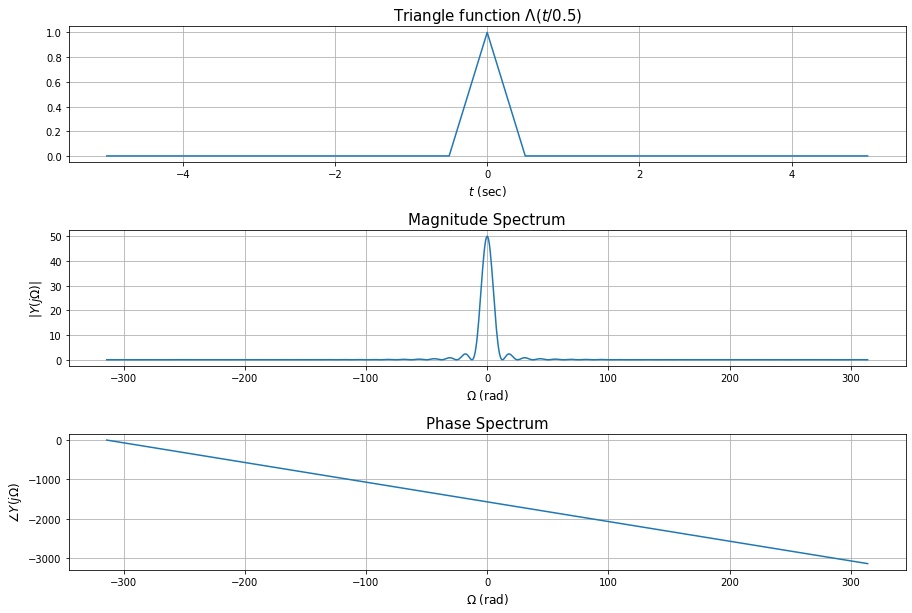</center>

Your graph should include these requirements:

* Figure size: (15, 10)

* Graph 1: Rectangle function
    * Title: `rf"Triangle function $\Lambda(t/{a})$"` with fontsize 15
    * Xlabel: `r"$t$ (sec)"` with fontsize 12
    * Grid

* Graph 2: Magnitude spectrum
    * Title: `"Magnitude Spectrum"` with fontsize 15
    * Xlabel: `r"$\Omega$ (rad)"` with fontsize 12
    * Ylabel: `r"$|Y(j\Omega)|$"` with fontsize 12
    * Grid

* Graph 3: Phase spectrum
    * Title: `"Phase Spectrum"` with fontsize 15
    * Xlabel: `r"$\Omega$ (rad)"` with fontsize 12
    * Ylabel: `r"$\angle Y(j\Omega)$"` with fontsize 12
    * Grid

Note: your graph should as similar as the above graph!

---
📣The horizontal axes of graph 2 and graph3 are angular frequency, but the result you computed in Question3-2 is frequency. Therefore, you need to multiply $2\pi$ to represent angular frequency. ($\Omega=2{\pi}f$)

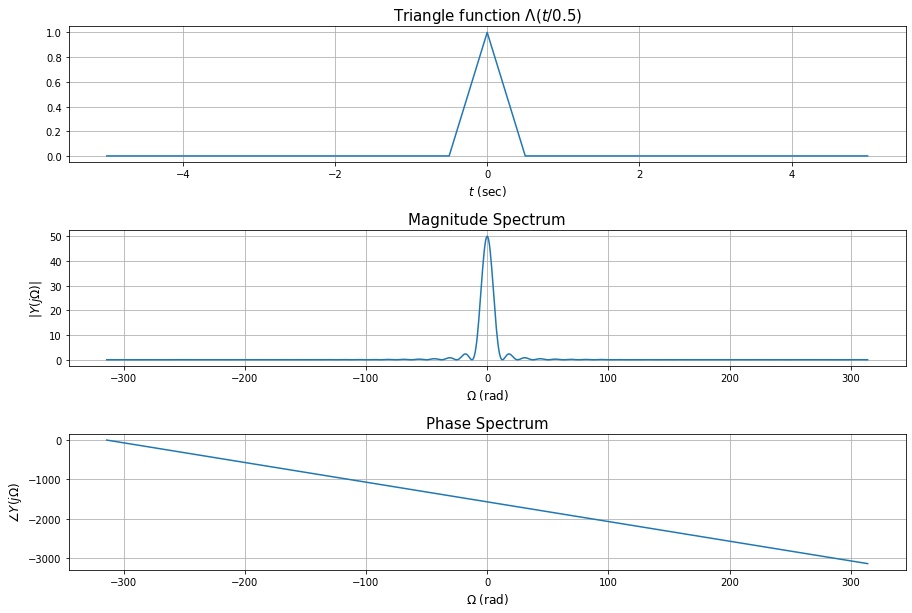

In [207]:
# finish codes below! ---------------------------
fig, axes = plt.subplots(3,1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5) # prevent subplot overlapping

axes[0].plot(x,y)
axes[0].grid(True)
axes[0].set_xlabel(fr"$t$ (sec)", fontsize=12)
axes[0].set_title(fr"Triangle function $\Lambda(t/{a})$", fontsize=15)

axes[1].plot(freq*(2*np.pi), magnitude)
axes[1].grid(True)
axes[1].set_xlabel(fr"$\Omega$ (rad)", fontsize=12)
axes[1].set_ylabel(fr"$|Y(j\Omega)|$", fontsize=12)
axes[1].set_title(fr"Magnitude Spectrum", fontsize=15)

axes[2].plot(freq*(2*np.pi), phase)
axes[2].grid(True)
axes[2].set_xlabel(fr"$\Omega$ (rad)", fontsize=12)
axes[2].set_ylabel(fr"$\angle Y(j\Omega)$", fontsize=12)
axes[2].set_title(fr"Phase Spectrum", fontsize=15)

plt.show()
#------------------------------------------------

### (45%) Question4: Discrete Convolution

<center><a title="Convolution_of_box_signal_with_itself.gif: Brian Amberg
derivative work: Tinos, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Convolution_of_box_signal_with_itself2.gif"><img height="150px" width="auto" alt="Convolution of box signal with itself2" src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif"></a></center>

The discrete convolution of $f$ and $g$ is given by,

\begin{equation}
(f*g)[n]
=\sum_{m=-\infty }^{\infty }f[m]g[n-m]
=\sum_{m=-\infty }^{\infty }f[n-m]g[m]
\tag{3}
\end{equation}

Note: From the viewpoint of numpy ***array***, the number inside the square bracket indicates the index of the sequence. For example, $g[n-m]$ means the $(n-m+1)th$ element in sequence $g$. (The index is starting from 0!)

>用array index的觀點去推算做完卷積的長度會是什麼

In practical, we usually process finite length sequences in discrete convolution case so that the equation above would not sum these infinite terms up.

Assume the length of $f$ sequence is $N_f$, and that of $g$ sequence is $N_g$.

Of course, the index of sequence $f$ is range from 0 to $N_f-1$, that is $\{f[i]\}, 0\le{i}\le{N_f-1}$, and $\{g[i]\}, 0\le{i}\le{N_g-1}$ in the case of sequence $g$.

Let's back to Equation 3, there are some cases:

1. $m=0, n-m=0$
    * $n = 0$

2. $m=0, n-m=N_g-1$
    * $n = N_g - 1$

3. $m=N_f-1, n-m=0$
    * $n = N_f - 1$

4. $m=N_f-1, n-m=N_g-1$
    * $n = N_f + N_g - 2$


From case 1 and case 4, we can infer that the length of the result $(f*g)[n]$ is $N_f + N_g - 1$. (important🔔)

#### (10%) 1. Create *two* 1-D array

Let's define the discrete version of triangle function (Eqn.4) and rectangle function (Eqn.5).

\begin{equation}
\Lambda\left(\dfrac{n}{a}\right) = 
    \begin{cases}
        1-\dfrac{|n|}{a}, \; |n| \le \lfloor{a}\rfloor \\
        0, \; \text{otherwise}
    \end{cases}
    \tag{4}
\end{equation}


$$
\Pi\left(\dfrac{n}{\tau}\right) = 
\begin{cases}
1, \; |n| \le \lfloor \dfrac{\tau}{2} \rfloor,\\
0, \; \text{otherwise}
\end{cases}
\tag{5}
$$

>因為是離散的，所以這裡的n是整數，也就是$...,-3,-2,-1,0,1,2,3...$

Please create the following two arrays.

1. $y_{1}[n]=\Lambda\left(\dfrac{n-2}{a}\right)$, where $n \in [-20,20]$ with $a=7$.

2. $y_{2}[n]=\Pi\left(\dfrac{n}{\tau}\right)$, where $n \in [-20,20]$ with $\tau=6$.



<center>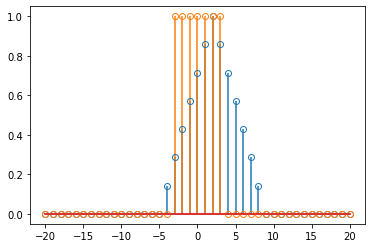</center>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


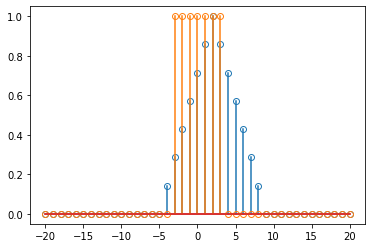

In [208]:
# We have used the rectangle function is Quiz#2 before
# 
# finish codes below! ---------------------------

def rectangle(n, tau):
    '''Discrete version'''
    y = np.where(np.abs(n)<=int(tau/2), 1, 0)
    return y

def triangle(n, a):
    '''Discrete version'''
    y = np.where(np.abs(n-2)<=int(a),1-np.abs(n-2)/a,0)
    return y

#right bound=21 so 20 can be compute
range1 = (-20,21)
range2 = (-20,21)
a = 7
tau = 6

x1 = np.arange(*range1)
x2 = np.arange(*range2)
y1 = triangle(x1,a)
y2 = rectangle(x2, tau)

#------------------------------------------------
# Check the result by:
stem1_obj = plt.stem(x1, y1, markerfmt='C0o', linefmt='C0-')
stem1_obj[0].set_markerfacecolor('none')
stem2_obj = plt.stem(x2, y2, markerfmt='C1o', linefmt='C1-')
stem2_obj[0].set_markerfacecolor('none')
plt.show()

#### (15%) 2. Implement 1-D discrete convolution

\begin{equation}
(f*g)[n]
=\sum_{m=-\infty }^{\infty }f[m]g[n-m]
\end{equation}


Please implement 1-D discrete convolution as a function named `conv1d`

📄Hint
* The length of sequence $(f*g)[n]$ is $N_f+N_g-1$
* The $m$ index in sequence $f$ should in $[0, N_f-1]$
* The $n-m$ index in sequence $g$ should in $[0, N_g-1]$
* The first for-loop is to compute the n-th element in $(f*g)$
* The second for-loop is to swept the m-th element in $f$
* Remember to sum up the elements in the second for-loop

⛔️Using the pre-implemented functions (e.g., `np.convolve`, `scipy.signals.convolution`...) is not allowed!

<center>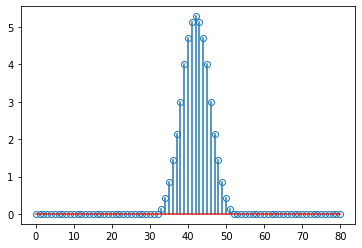</center>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


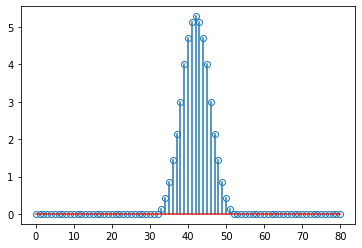

In [209]:
# finish codes below! ---------------------------
def conv1d(y1,y2):
    #m=n=41
    m = len(y1) # length of f
    n = len(y2) # length of g
    #y.size=81
    y = np.zeros(n+m-1) # create a zero array to store result
    # compute the y[i] element
    #i:0->80
    for i in range(0, n+m-1):
        # swept m from 0 to (m-1)
        for j in range(0, m):
            # check the boundary
            #The  n−m  index in sequence  g  should in  [0,Ng−1]
            if (0 <= i-j < n): 
              # sum up the y[i] element
              #y[n]+=f[m]g[n−m]
              y[i] += y1[j] * y2[i-j]              
           
    return y


y_conv = conv1d(y1,y2)

#------------------------------------------------
# Check the result by:
stem1_obj = plt.stem(y_conv, markerfmt='C0o', linefmt='C0-')
stem1_obj[0].set_markerfacecolor('none')
plt.show()
#plt.plot(y_conv)

#### (5%) 3. Define the x-axis of the convolution result in Question 4-2

\begin{equation}
(f*g)[n]
=\sum_{m=-\infty }^{\infty }f[m]g[n-m]
\end{equation}


From the above formula, we can see that the output axis $n$ is defined by the axis range of $f$ and $g$ sequences. 
Assume the axis boundaries of sequence $f$ and $g$ are, respectively, $[n_{f,min}, n_{f,max}]$ and $[n_{g,min}, n_{g,max}]$.  
(現在的n代表的是座標值，例如$\{...,-20,-19,..., 0,1,2,...\}$，在這題的case，$f$是從-20到20，則坐標軸的範圍就是$[-20, 20]$，$g$也是以此類推)

Within the summation symbol, $m$ needs to be within axis range of sequence $f$ (Eqn. 6), and $n-m$ needs to be within axis range of sequence $g$ (Eqn. 7).

\begin{equation}
n_{f,min} \le m \le n_{f,max}
\tag{6}
\end{equation}

\begin{equation}
n_{g,min} \le n-m \le n_{g,max}
\tag{7}
\end{equation}

From Eqn. 6, 7, we can infer the axis range of output sequence $(f*g)[n]$ (Eqn. 8),

\begin{equation}
n_{f,min} + n_{g,min} \le n \le n_{f,max} + n_{g,max}
\tag{8}
\end{equation}

Therefore, the length of output sequence is $N_{f*g} = N_f + N_g - 1$.

\begin{align}
N_{f*g} &= (n_{f,max} + n_{g,max})-(n_{f,min} + n_{g,min})+1 \\
&= (n_{f,max}-n_{f,min}) + (n_{g,max}-n_{g,min}) + 1 \\
&= (N_f-1) + (N_g-1) + 1 \\
&= N_f + N_g - 1
\end{align}

---
Please define the axis for output sequence $f*g$  
Note: `range1` and `range2` you should pay attention to them!

In [212]:
# You need to use range1 and range2 as varaibles
# 
# finish codes below! ---------------------------
#nf,min+ng,min
start = range1[0]+range2[0]
#nf,max+ng,max+1
end = range1[1]-1+range2[1]-1+1
x_conv = np.arange(start,end)
#------------------------------------------------
# Check the result by:
#print("Left boundary: %d" % x_conv[0])
#print("Right boundary: %d" % x_conv[-1])


#### (15%) 4. Plot a graph: compare result $(y_1*y_2)[n]$ with $y_1[n]$ and $y_2[n]$

Please plot the convolution result. Your graph should satisfy these requirements:
* FigureSize: `(15,8)`

* Subfigure1
    * Marker format: `'C0o'`
    * Line format: `'C0-'`
    * use_line_collection: `True`
    * Title: `r"$y_1[n]$"` with fontsize 15
    * Grid

* Subfigure2
    * Marker format: `'C1o'`
    * Line format: `'C1-'`
    * use_line_collection: `True`
    * Title: `r"$y_2[n]$"` with fontsize 15
    * Grid

* Subfigure3
    * Marker format: `'C2o'`
    * Line format: `'C2-'`
    * use_line_collection: `True`
    * Title: `r"$y_1[n]*y_2[n]$"` with fontsize 15
    * XLabel: "n" with fontsize 12
    * Grid


📄Hint: 
* [Axes.stem](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.stem.html)

Note: your graph should as similar as the below graph!

<center>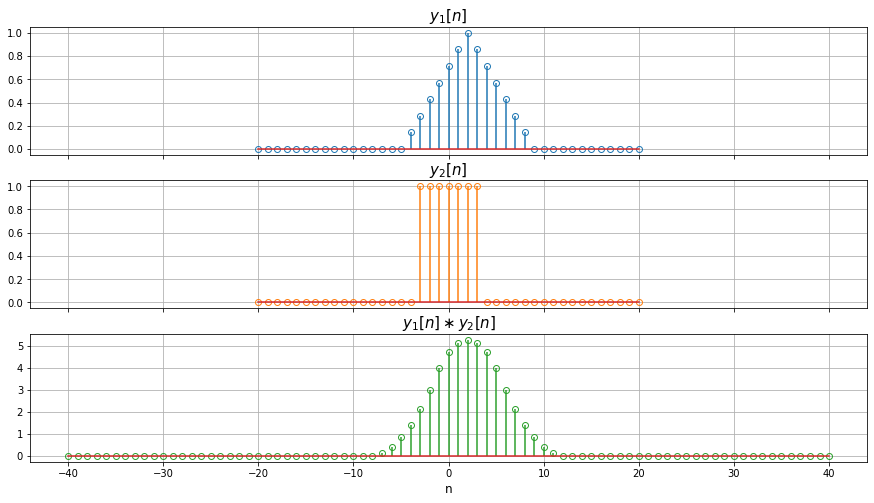</center>

<Figure size 432x288 with 0 Axes>

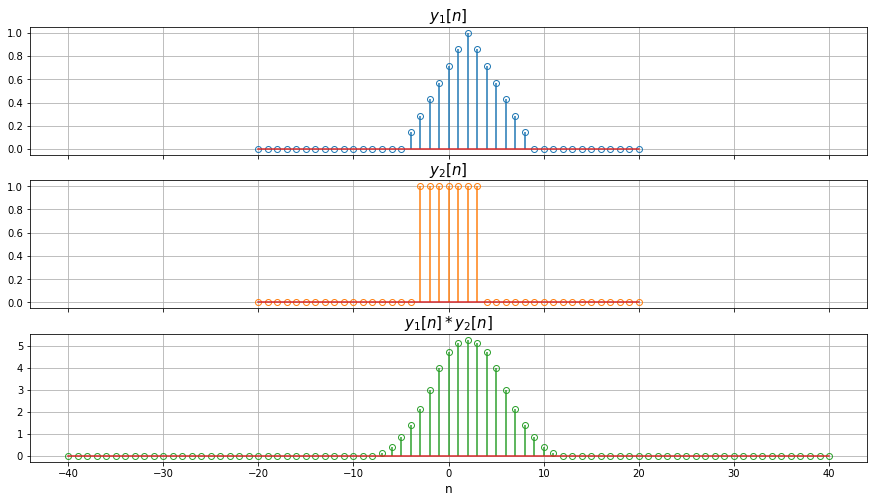

In [213]:
plt.clf()
# finish codes below! ---------------------------
#sharex=True->the 3 subplots share the same x axis (n)
fig, axes = plt.subplots(3, 1, figsize=(15,8), sharex=True)
#markerfmt='C0o'->filled circles with the first color
#linefmt='C0-'->solid line with the first color
stem1_obj = axes[0].stem(x1, y1, markerfmt='C0o', linefmt='C0-', use_line_collection=True)
stem1_obj[0].set_markerfacecolor('none')
axes[0].set_title(fr"$y_1[n]$", fontsize=15)
axes[0].grid(True)

stem2_obj = axes[1].stem(x2, y2, markerfmt='C1o', linefmt='C1-', use_line_collection=True)
stem2_obj[0].set_markerfacecolor('none')
axes[1].set_title(fr"$y_2[n]$", fontsize=15)
axes[1].grid(True)

stem3_obj = axes[2].stem(x_conv, y_conv, markerfmt='C2o', linefmt='C2-', use_line_collection=True)
stem3_obj[0].set_markerfacecolor('none')
axes[2].set_title(fr"$y_1[n]*y_2[n]$", fontsize=15)
axes[2].set_xlabel(fr"n", fontsize=12)
axes[2].grid(True)
#------------------------------------------------
plt.show()

### (30%) Bonus: **Goldstein–Price function**

The **Goldstein–Price function** shown below is one of the test functions for optimization,

$$
\begin{align}
f(x,y) =
\left[ 1+(x+y+1)^{2}(19-14x+3x^{2}-14y+6xy+3y^{2}) \right]
\left[ 30+(2x-3y)^{2}(18-32x+12x^{2}+48y-36xy+27y^{2}) \right]
\end{align}
$$

It can be examined that it has a global minimum at $(0,-1) \; \text{where} \; x,y \in [-2,2]$


(Reference: https://en.wikipedia.org/wiki/Test_functions_for_optimization)

#### (10%) 1. Construct the 2D array for the Goldstein–Price function

Please construct the 2D array for $x$, $y$, $z$ of the Goldstein–Price function.

The spacing for $\Delta{x}$ and $\Delta{y}$ is 0.005.

In [214]:
# finish codes below! ---------------------------
def Goldstein(x,y):
    
    f1 = 1+((x+y+1)**2)*(19-14*x+3*x**2-14*y+6*x*y+3*y**2)
    f2 = 30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2)
    return f1 * f2

dx = 0.005
dy = 0.005

# 1d-array: broadcasting
x = linspace(-2,2,dx).reshape(1,-1)
y = linspace(-2,2,dy).reshape(-1,1)
# 2d-array
z = Goldstein(x,y)
#------------------------------------------------

#### (10%) 2. Visualize the function in 2D plane

Please plot the Goldstein–Price function.
Your graph should satisfy these requirements:
* FigureSize: `(8,8)`
* Title: `"Goldstein–Price function"` with fontsize 20
* Xlabel: `"x"` with fontsize 15
* Ylabel: `"y"` with fontsize 15
* Colormap: `'jet'`
* Norm: logarithm
* Origin: ???
* Extent: $x,y \in [-2,2]$


📄Hint: 
* [Axes.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html)
* Lecture: Matplotlib

Note: your graph should as similar as the below graph!

<center>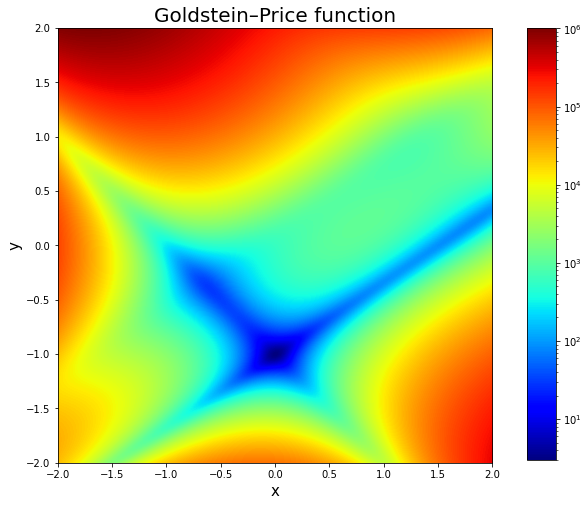</center>

<Figure size 432x288 with 0 Axes>

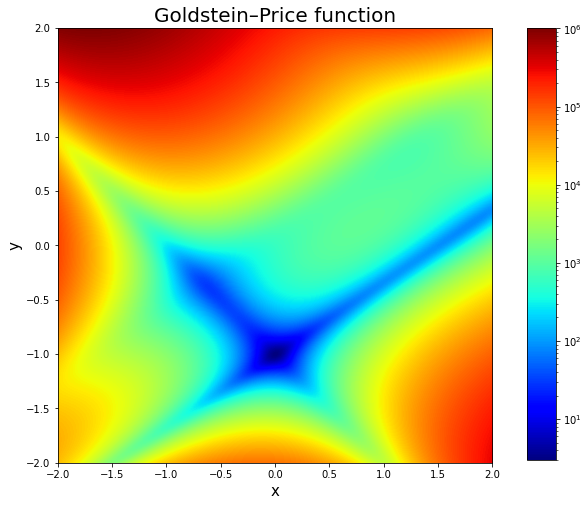

In [215]:
import matplotlib.pyplot as plt
from matplotlib import colors

# finish codes below! ---------------------------
plt.clf()
fig = plt.figure(figsize=(8,8))
cax = fig.add_axes([0.95, 0.13, 0.05, 0.75]) # [left, bottom, width, height]

ax = fig.add_subplot(111)
#Norm: logarithm->norm=colors.LogNorm(vmin=z.min(), vmax=z.max())
#extent=[x.min,x.max,y.min,y.max]
im = ax.imshow(z, cmap='jet', norm=colors.LogNorm(vmin=z.min(), vmax=z.max()), origin='lower', extent=[-2,2,-2,2])
ax.set_title(fr"Goldstein–Price function", fontsize=20)
ax.set_xlabel(fr"x", fontsize=15)
ax.set_ylabel(fr"y", fontsize=15)

fig.colorbar(im, cax=cax)
#------------------------------------------------
plt.show()

#### (10%) 3. Find local(global) minimum using `Scipy`

Please find the local (global) minima of Goldstein–Price function.

Note: x0=`(-2,2)`, tol=`1e-8`

* Redefine the function in Bonus-1 with iuput x is an 1-D array with shape (n,).

For example,
$$f(x)=(x^2+y-11)^2 + (x+y^2-7)^2$$
```Python
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
```
>這裡x是一個sequence，x[0]代表第一個變數，x[1]代表第二個變數...


```python
scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None,
                        hess=None, hessp=None, bounds=None, constraints=(), 
                        tol=None, callback=None, options=None)
```
>請去研究bounds和tol要怎麼設定，x0設定為(-2, 2)

📄Hint: [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

If your code is correct, the output should be similar to the below.
```
(x1, x2):[-1.73528929e-08 -1.00000001e+00]
f(x1, x2):3.0000000000001
```

In [216]:
from scipy.optimize import minimize

# finish codes below! ---------------------------
def func(x):
    f1 =lambda x: 1+((x[0]+x[1]+1)**2)*(19-14*x[0]+3*x[0]**2-14*x[1]+6*x[0]*x[1]+3*x[1]**2)
    f2 =lambda x: 30+((2*x[0]-3*x[1])**2)*(18-32*x[0]+12*x[0]**2+48*x[1]-36*x[0]*x[1]+27*x[1]**2)
    return f1*f2

res = minimize(func(x), x0=(-2,2), bounds=((-2,2),(-2,2)), tol=1e-8)
#------------------------------------------------
print(f'(x1, x2):{res.x}')
print(f'f(x1, x2):{res.fun}')

TypeError: ignored